# **Final: Removing Outliers with Histograms and Boxplot**
On sabana 15, still manual -> this has to be done for each area

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dflist_areas = []
areas = ['ingenieria', 'negocios','estudioscreativos', 'salud', 'cienciassociales', 'ambienteconstruido']

for elem in areas:
    df_area = pd.read_csv("C:/Users/Milara/..._"+elem+"_v1.csv",encoding="ISO-8859-1")
    dflist_areas.append(df_area)

# Keeping Variables 

In [3]:
def keep_var(prefix,lista):
    res = []
    #res.append(lista[0])
    for elem in prefix:
        for i in range(len(lista)):
            value = lista[i].find(elem)
            if value >= 0:
                res.append(lista[i])
    #res.append('For_Prom')
    return res

for i in range(len(areas)):
    listRed = keep_var(['_ord','_n','Eva_ini','Puntaje','Cal','For_Prom'],dflist_areas[i].columns)
    #listRed = keep_var(['Puntaje'],dflist_areas[i].columns)
    df_red = dflist_areas[i][listRed].dropna()
    dflist_areas[i] = df_red.drop('For_Prom_old', axis = 1)

In [19]:
dflist_areas[1].groupby('OTRO_IDIOMA_ord').count() #LABORAL_ACTU_ord  OTRO_IDIOMA_ord

,P1_ord,P2_ord,P3_ord,P4_ord,P5_ord,P6_ord,P7_ord,P8_ord,LABORAL_ACTU_ord,ira_n,...,Puntaje Seccion 15 Examen,Puntaje Seccion 16 Examen,Puntaje Seccion 17 Examen,Puntaje Seccion 18 Examen,Puntaje Seccion 19 Examen,Puntaje Seccion 20 Examen,Puntaje Seccion 21 Examen,Puntaje Seccion 22 Examen,CalPromedioPrepa,For_Prom
OTRO_IDIOMA_ord,,,,,,,,,,,,,,,,,,,,,
0.0,111,111,111,111,111,111,111,111,111,111,...,111,111,111,111,111,111,111,111,111,111
1.0,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430,...,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430


# Boxplots and Histograms before the removal

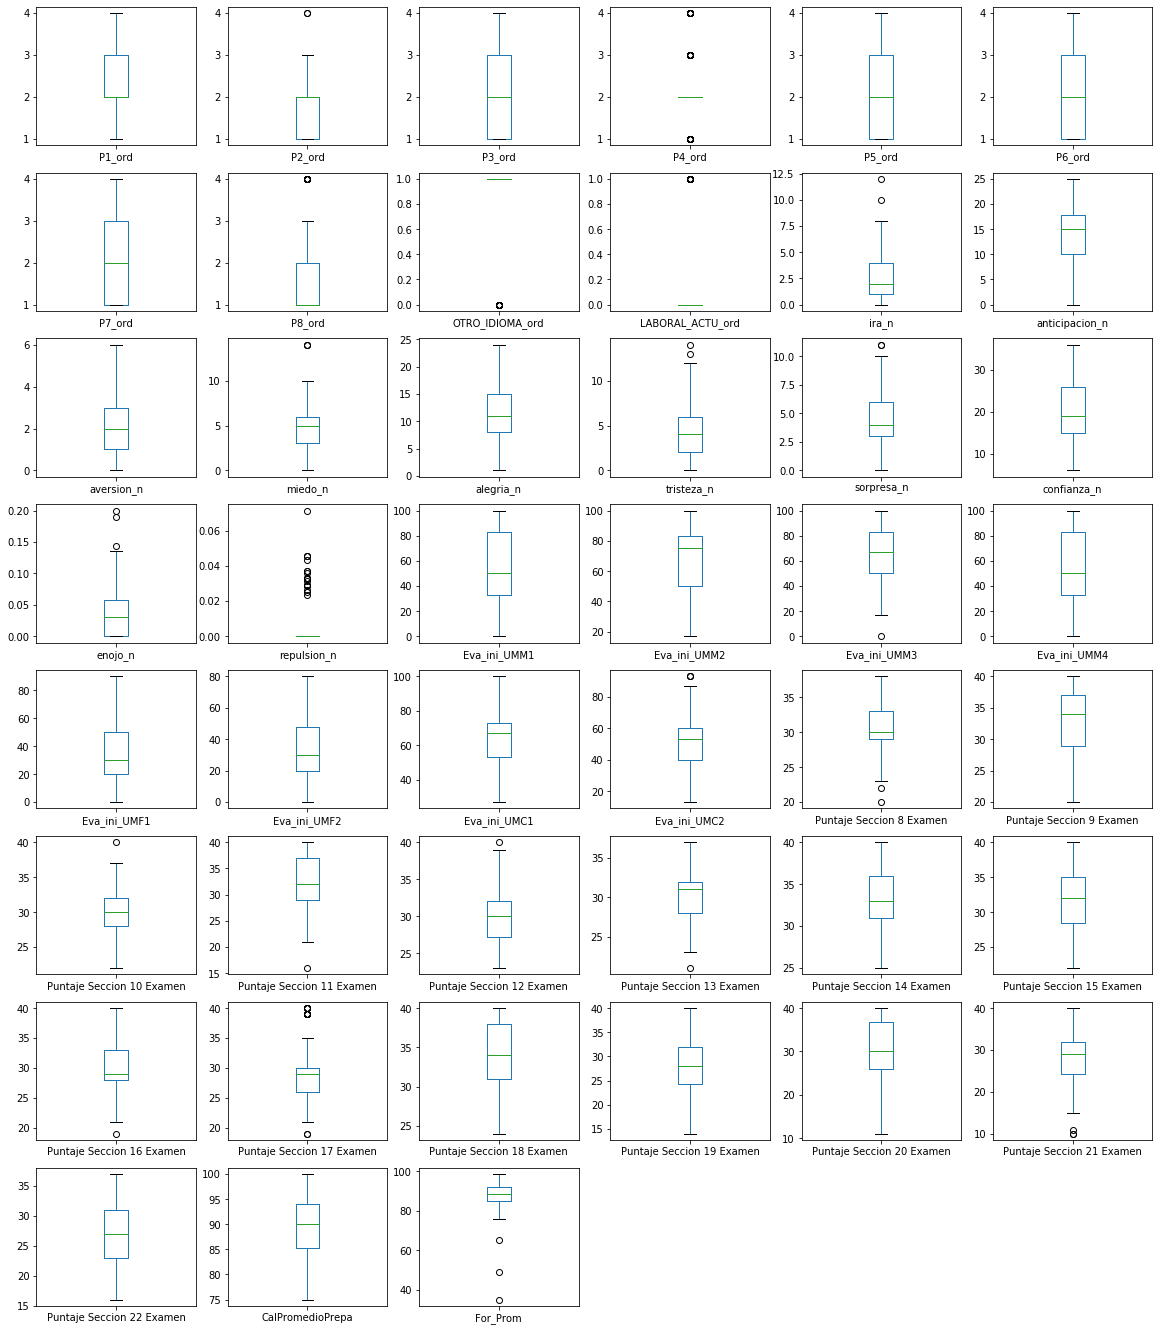

In [39]:
area_id = 5
area_in = dflist_areas[area_id]

fig=plt.figure(figsize=(20,30))
for i in range(len(area_in.columns)):
    ax = fig.add_subplot(10,6,i+1,)
    ax = area_in[area_in.columns[i]].plot.box()

# Removing Variables with huge Skewness

In [40]:
area_in = dflist_areas[area_id]

skewness = area_in.skew(axis = 0, skipna = True).sort_values(ascending = False)
remove_skew = skewness[(skewness>2) | (skewness<-2)] #commonly used by authors
remove_skew.drop('For_Prom', axis = 0, inplace = True) # not removed becuase this is our target variable
area_in = area_in.drop(remove_skew.index, axis = 1)
print(remove_skew.index, "Variables removed")

Index(['repulsion_n', 'OTRO_IDIOMA_ord'], dtype='object') Variables removed


# Removing Outliers with IQR

In [41]:
def removeOutliers(df,col = "test"):
    """
    Function that removes outliers using the IQR
    """
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3-Q1
    lim_above = Q1 - 1.5 * IQR 
    lim_below = Q3 + 1.5 * IQR
    return df[ (df[col] >= lim_above) & (df[col] <= lim_below )]

In [42]:
before = area_in.shape

print(before, "Before")

for var in area_in.columns:
    if len(area_in[var].unique()) > 4:
        area_in = removeOutliers(area_in,col = var)
    #print(var, area_in.shape)
    
print(area_in.shape, "After")
print(before[0]-area_in.shape[0], "Instances Removed")

(146, 43) Before
(120, 43) After
26 Instances Removed


# Boxplots and Histograms after the removal

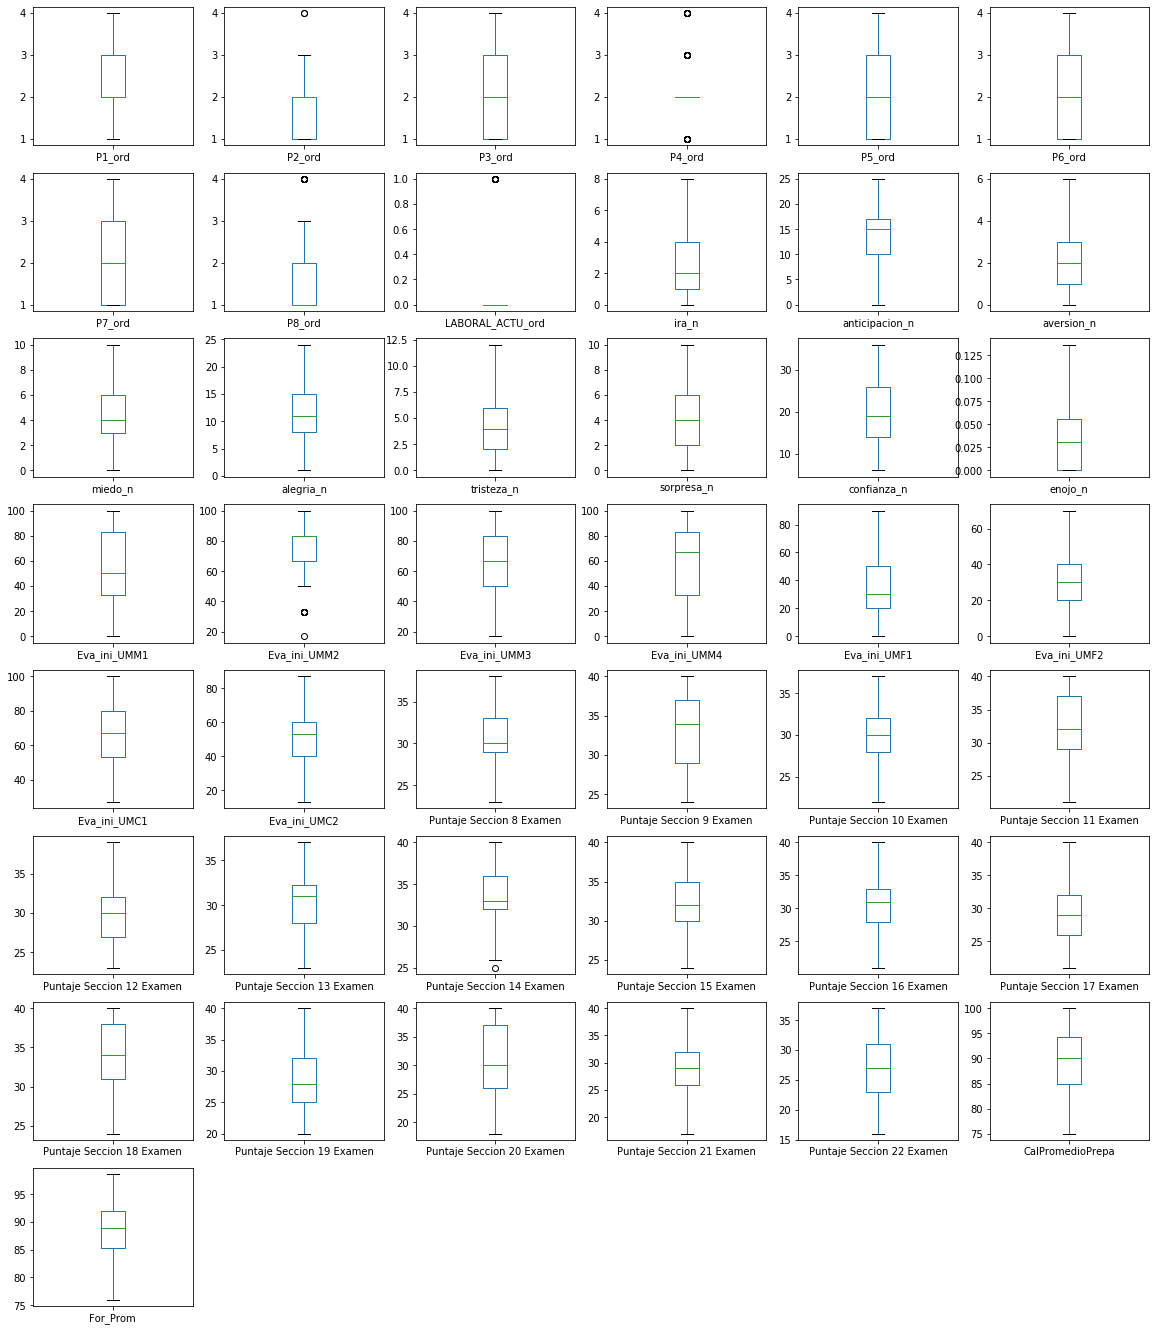

In [43]:
fig=plt.figure(figsize=(20,30))
for i in range(len(area_in.columns)):
    ax = fig.add_subplot(10,6,i+1,)
    ax = area_in[area_in.columns[i]].plot.box()

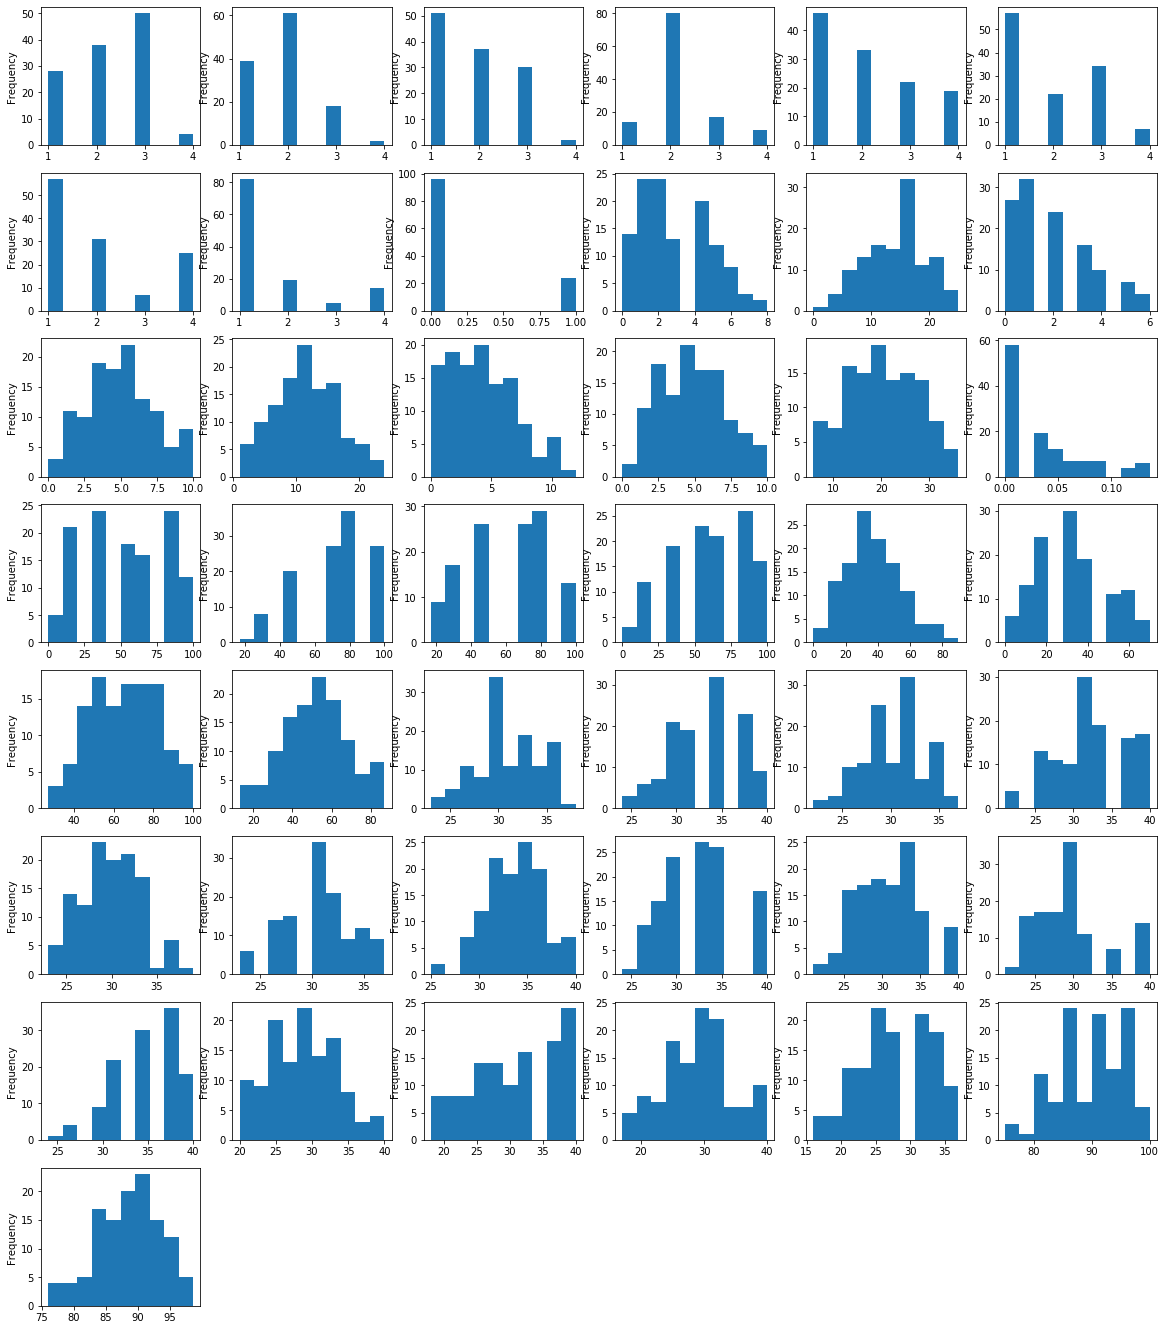

In [44]:
fig=plt.figure(figsize=(20,30))
for i in range(len(area_in.columns)):
    ax = fig.add_subplot(10,6,i+1,)
    ax = area_in[area_in.columns[i]].plot.hist()

# Save the data

In [45]:
area_in.to_csv("C:/Users/Milara/..._"+areas[area_id]+"_v1.csv", encoding="ISO-8859-1", index = False) #thus it is necessary to save it as the usual type of coding